In [1]:
import sympy as sp
from sympy import init_printing
init_printing()
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent.parent))
from cores.dynamical_systems.cartpole import CartPole
import torch
import numpy as np

In [2]:
mass_cart = 1.0
mass_pole = 0.1
length = 0.5

In [3]:
system_torch = CartPole(mass_cart=mass_cart, mass_pole=mass_pole, length=length, friction_coef=0.0, dtype=torch.float32)

In [4]:
x, theta, x_dot, theta_dot = sp.symbols(r'x \theta \dot{x} \dot{\theta}')
u = sp.symbols(r'u')
states = sp.Matrix([x, theta, x_dot, theta_dot])
controls = sp.Matrix([u])

In [5]:
m_p, m_c, l, g = sp.symbols('m_p m_c l g')
params = sp.Matrix([m_c, m_p, l, g])

In [6]:
f1 = x_dot
f2 = theta_dot
f3 = (m_p*sp.sin(theta)*(-l*theta_dot**2) + 0.5*m_p*g*sp.sin(2*theta) + u) / (m_c + m_p*sp.sin(theta)**2)
f4 = ((m_p+m_c)*g*sp.sin(theta) - 0.5*m_p*l*theta_dot**2*sp.sin(2*theta) + u*sp.cos(theta)) / (l*(m_c + m_p*sp.sin(theta)**2))
f = sp.Matrix([f1, f2, f3, f4])

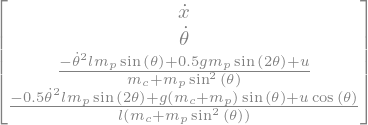

In [7]:
f

# Test f(x,u)

In [8]:
f_func = sp.lambdify((states, controls, params), f)
state_np = np.array([1., 2., 3.0, 5.0], dtype=np.float32)
control_np = np.array([3.], dtype=np.float32)
params_np = np.array([mass_cart, mass_pole, length, 9.81], dtype=np.float32)
print(f_func(state_np, control_np, params_np))


[[ 3.      ]
 [ 5.      ]
 [ 1.378213]
 [16.693336]]


In [9]:
state_torch = torch.tensor(state_np, dtype=torch.float32).unsqueeze(0)
control_torch = torch.tensor(control_np, dtype=torch.float32).unsqueeze(0)
f_torch = system_torch(state_torch, control_torch)
print(f_torch)

tensor([[ 3.0000,  5.0000,  1.3782, 16.6933]])


# Test df/dx

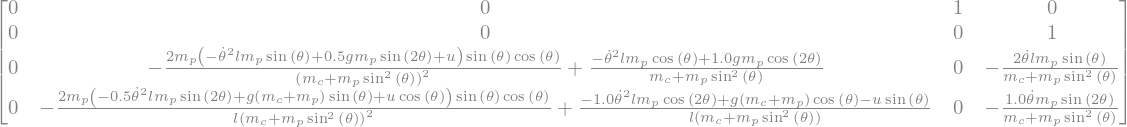

In [10]:
df_dx = f.jacobian(states)
df_dx

In [11]:
df_dx_func = sp.lambdify((states, controls, params), df_dx)
print(df_dx_func(state_np, control_np, params_np))

[[  0.           0.           1.           0.        ]
 [  0.           0.           0.           1.        ]
 [  0.          -0.01545923   0.          -0.41992816]
 [  0.         -10.65834618   0.           0.34950355]]


In [12]:
df_dx_torch = system_torch.f_dx(state_torch, control_torch)
print(df_dx_torch)

tensor([[[  0.0000,   0.0000,   1.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   1.0000],
         [  0.0000,  -0.0155,   0.0000,  -0.4199],
         [  0.0000, -10.6583,   0.0000,   0.3495]]])


# Test df/du

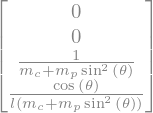

In [13]:
df_du = f.jacobian(controls)
df_du

In [14]:
df_du_func = sp.lambdify((states, controls, params), df_du)
print(df_du_func(state_np, control_np, params_np))

[[ 0.        ]
 [ 0.        ]
 [ 0.92363214]
 [-0.76873314]]


In [15]:
df_du_torch = system_torch.f_du(state_torch, control_torch)
print(df_du_torch)

tensor([[[ 0.0000],
         [ 0.0000],
         [ 0.9236],
         [-0.7687]]])


# d^2f/dx^2

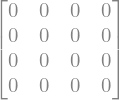

In [16]:
f1_dxdx = f1.diff(states).jacobian(states)
f1_dxdx

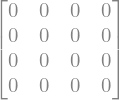

In [17]:
f2_dxdx = f2.diff(states).jacobian(states)
f2_dxdx

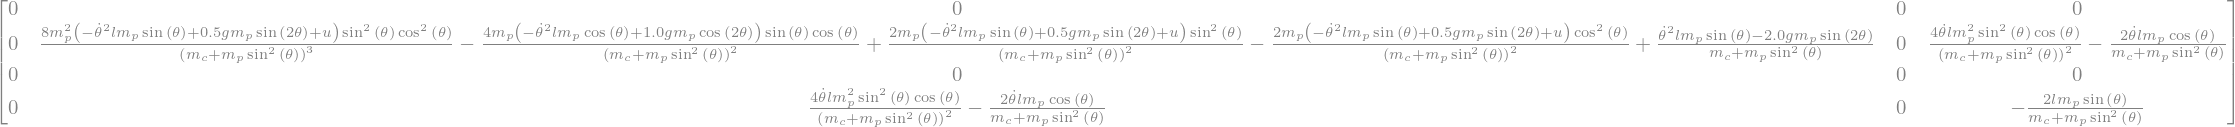

In [18]:
f3_dxdx = f3.diff(states).jacobian(states)
f3_dxdx

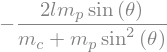

In [32]:
f3_dxdx[3,3]

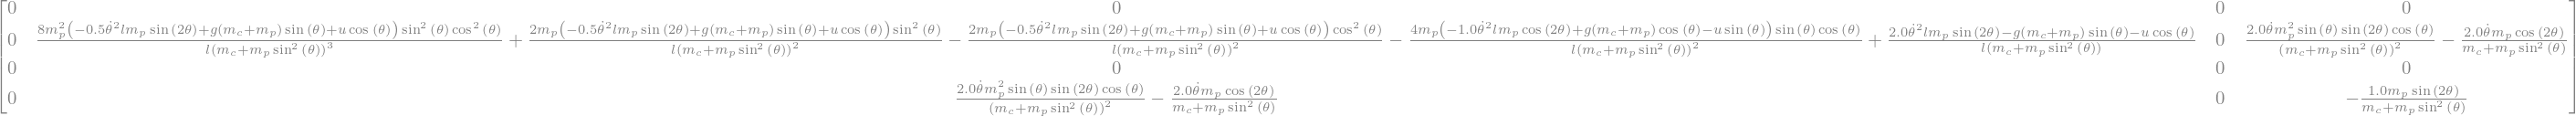

In [19]:
f4_dxdx = f4.diff(states).jacobian(states)
f4_dxdx

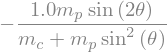

In [35]:
f4_dxdx[3,3]

# d^2f/dxdu

In [20]:
f1_dxdu = f1.diff(states).jacobian(controls)
f1_dxdu

In [21]:
f2_dxdu = f2.diff(states).jacobian(controls)
f2_dxdu

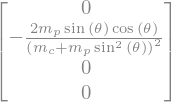

In [22]:
f3_dxdu = f3.diff(states).jacobian(controls)
f3_dxdu

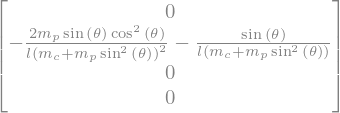

In [23]:
f4_dxdu = f4.diff(states).jacobian(controls)
f4_dxdu